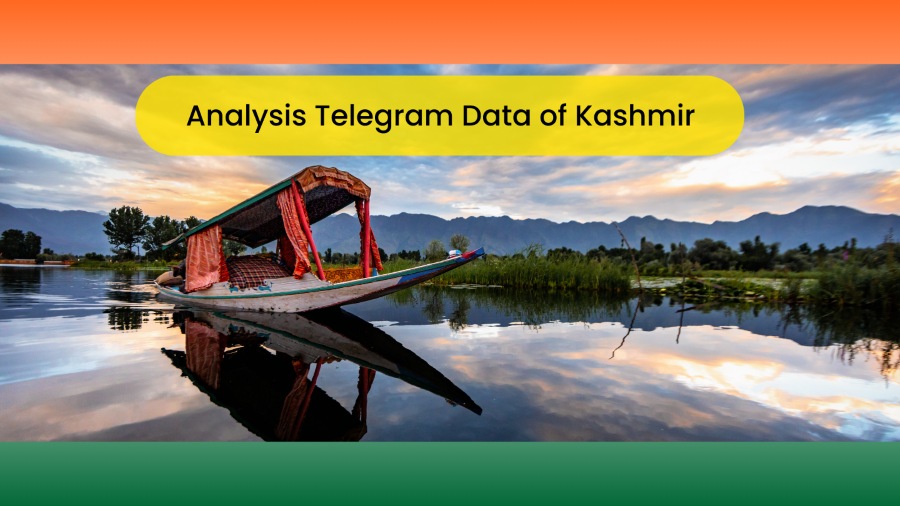

## List of content

* Overview
* Steps for Analyzing Exported Telegram Data
    1. Data Export Process
    2. Data Cleaning and Preparation
    3. Exploratory Data Analysis (EDA)
    4. Advanced Analysis Techniques
    5. Visualization
    6. Insights and Reporting
    7. Ethical Considerations
* Conclusion

## Overview

Analyzing data exported from Telegram can provide valuable insights into user interactions, engagement patterns, and content trends. Here’s a detailed approach to effectively analyze this data:

## Steps for Analyzing Exported Telegram Data

### 1. **Data Export Process**
   - **Using Telegram Desktop**: You can export your data by going to **Settings > Advanced > Export Telegram Data**. Select the types of data you want (messages, contacts, media, etc.).

**Notice:** To analyze data, you should export the machine-readable version. Because the JSON format is usable for analyze data.

![export telegram](https://static1.makeuseofimages.com/wordpress/wp-content/uploads/2023/08/6-click-on-the-export-button-to-export-your-entire-telegram-data.jpg?q=50&fit=crop&w=825&dpr=1.5 "title")


### **Data Types and Structure**
   - **Messages**: Contains text, timestamps, sender information, and possibly media links.
   - **User Information**: Includes usernames, profile pictures, and contact details.
   - **Group/Channel Information**: Details about group members, messages, and interactions.
   - **Media Files**: Images, videos, and documents shared in chats.



---



### 2. **Data Cleaning and Preparation**
   - **Format Data**: Convert exported files (usually in JSON or CSV) into a format suitable for analysis (e.g., using Python’s Pandas library).
   - **Remove Irrelevant Data**: Filter out bots, spam, or unnecessary messages.
   - **Standardize Formats**: Ensure dates and times are in a consistent format for analysis.

### 3. **Exploratory Data Analysis (EDA)**
   - **Basic Statistics**: Count total messages, active users, and media files.
   - **User Activity Analysis**: Identify the most active users and peak messaging times.
   - **Content Analysis**: Assess message lengths, common keywords, and sentiment.

In [ ]:
import pandas as pd
import json

# Load the JSON data
with open('/content/result.json', 'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('telegram_data.csv', index=False)

print("Conversion completed! CSV file created: telegram_data.csv")

In [ ]:
import pandas as pd
import json

# Load the JSON file
with open('/content/result.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Display the structure of the data
print(json.dumps(data, indent=2))

In [ ]:
# Convert messages to DataFrame
messages = pd.DataFrame(data['messages'])

# Display the first few rows
messages.head(5)

,id,type,date,date_unixtime,from,from_id,text,text_entities
0,4323,message,2024-09-01T07:17:36,1725162456,Kashmir Weather,channel1405168102,Weather Update\n\nA Western Disturbance is set...,"[{'type': 'plain', 'text': 'Weather Update A ..."
1,4324,message,2024-09-02T15:57:03,1725280023,Kashmir Weather,channel1405168102,Weather Alert\n\nThe convergence of a Western ...,"[{'type': 'plain', 'text': 'Weather Alert The..."
2,4325,message,2024-09-02T16:58:22,1725283702,Kashmir Weather,channel1405168102,"Cyclone-Like Winds Sweep Through Kulgam, Gusts...","[{'type': 'plain', 'text': 'Cyclone-Like Winds..."
3,4326,message,2024-09-02T18:08:04,1725287884,Kashmir Weather,channel1405168102,Reports indicate that a cloudburst near the Sp...,"[{'type': 'plain', 'text': 'Reports indicate t..."
4,4327,message,2024-09-02T19:25:11,1725292511,Kashmir Weather,channel1405168102,[SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VIE...,"[{'type': 'plain', 'text': 'SHOPIAN POLICE ISS..."


In [ ]:
messages.isnull().sum()

,0
id,0
type,0
date_unixtime,0
from,0
from_id,0
text,0
text_entities,0


In [ ]:
# Count the number of messages sent by each user
message_count = messages['from'].value_counts()
print(message_count)

from
Kashmir Weather    16
Name: count, dtype: int64


<Axes: title={'center': 'Daily Message Count'}, xlabel='date'>

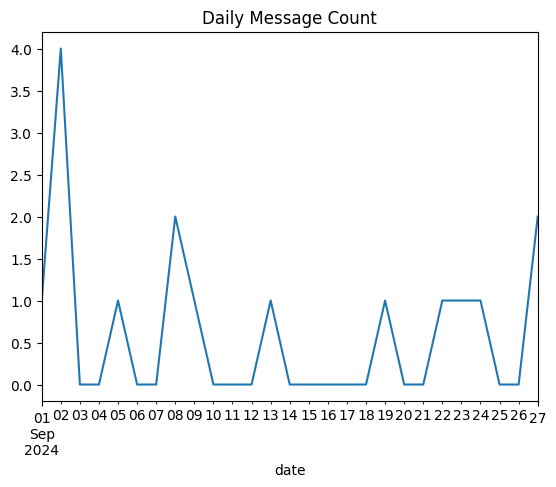

In [ ]:
# Convert the timestamp to a datetime object
messages['date'] = pd.to_datetime(messages['date'])

# Set the date as the index
messages.set_index('date', inplace=True)

# Resample the data to get daily message counts
daily_messages = messages.resample('D').count()['text']
daily_messages.plot(title='Daily Message Count')

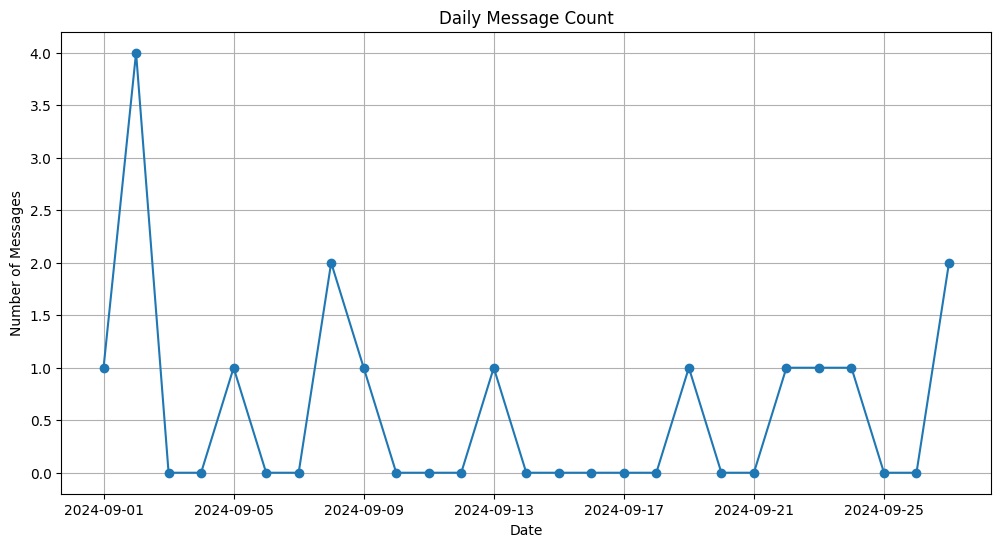

In [ ]:
import matplotlib.pyplot as plt

# Plot the daily message count
plt.figure(figsize=(12, 6))
plt.plot(daily_messages.index, daily_messages.values, marker='o')
plt.title('Daily Message Count')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.grid()
plt.show()



---



### 4. **Advanced Analysis Techniques**
   - **Sentiment Analysis**: Use NLP libraries like NLTK or SpaCy to analyze the sentiment of messages (positive, negative, neutral).
   - **Topic Modeling**: Apply techniques like LDA (Latent Dirichlet Allocation) to identify common themes in the conversations.
   - **Network Analysis**: Visualize user interactions to find key influencers using libraries like NetworkX.

**Notice:** These messages are extracted from a channel and not sent to a specific user. As a result, it cannot be network analyzed.

#### Sentiment Analysis

**Step 1: Import Libraries and Download Resources**

In [ ]:
import pandas as pd
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('punkt')  # For tokenization
nltk.download('wordnet')  # For lemmatization
nltk.download('vader_lexicon')  # For sentiment analysis

**Step 2: Tokenization**

In [ ]:
# Tokenize the messages
messages['tokens'] = messages['text'].apply(word_tokenize)

# Display the first few tokenized messages
print(messages[['text', 'tokens']].head())

                                                                  text  \
date                                                                     
2024-09-01 07:17:36  Weather Update\n\nA Western Disturbance is set...   
2024-09-02 15:57:03  Weather Alert\n\nThe convergence of a Western ...   
2024-09-02 16:58:22  Cyclone-Like Winds Sweep Through Kulgam, Gusts...   
2024-09-02 18:08:04  Reports indicate that a cloudburst near the Sp...   
2024-09-02 19:25:11  ['SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VI...   

                                                                tokens  
date                                                                    
2024-09-01 07:17:36  [Weather, Update, A, Western, Disturbance, is,...  
2024-09-02 15:57:03  [Weather, Alert, The, convergence, of, a, West...  
2024-09-02 16:58:22  [Cyclone-Like, Winds, Sweep, Through, Kulgam, ...  
2024-09-02 18:08:04  [Reports, indicate, that, a, cloudburst, near,...  
2024-09-02 19:25:11  [[, 'SHOPIAN, POLICE, 

**Step 3: Lemmatization**

In [ ]:
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text: tokenize, remove stop words, and lemmatize
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing
messages['processed'] = messages['text'].apply(preprocess)

# Display the first few processed messages
print(messages[['text', 'processed']].head())

                                                                  text  \
date                                                                     
2024-09-01 07:17:36  Weather Update\n\nA Western Disturbance is set...   
2024-09-02 15:57:03  Weather Alert\n\nThe convergence of a Western ...   
2024-09-02 16:58:22  Cyclone-Like Winds Sweep Through Kulgam, Gusts...   
2024-09-02 18:08:04  Reports indicate that a cloudburst near the Sp...   
2024-09-02 19:25:11  ['SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VI...   

                                                             processed  
date                                                                    
2024-09-01 07:17:36  [weather, update, western, disturbance, set, i...  
2024-09-02 15:57:03  [weather, alert, convergence, western, disturb...  
2024-09-02 16:58:22  [wind, sweep, kulgam, gust, reach, afternoon, ...  
2024-09-02 18:08:04  [report, indicate, cloudburst, near, sport, st...  
2024-09-02 19:25:11  [police, issued, helpl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Step 4: Sentiment Analysis**

In [ ]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']  # Return the compound score

# Apply sentiment analysis to the original message column
messages['sentiment'] = messages['text'].apply(get_sentiment)

# Display the sentiment scores
print(messages[['text', 'sentiment']].head())

                                                                  text  \
date                                                                     
2024-09-01 07:17:36  Weather Update\n\nA Western Disturbance is set...   
2024-09-02 15:57:03  Weather Alert\n\nThe convergence of a Western ...   
2024-09-02 16:58:22  Cyclone-Like Winds Sweep Through Kulgam, Gusts...   
2024-09-02 18:08:04  Reports indicate that a cloudburst near the Sp...   
2024-09-02 19:25:11  ['SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VI...   

                     sentiment  
date                            
2024-09-01 07:17:36    -0.2023  
2024-09-02 15:57:03    -0.5574  
2024-09-02 16:58:22     0.6808  
2024-09-02 18:08:04    -0.5994  
2024-09-02 19:25:11    -0.8091  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


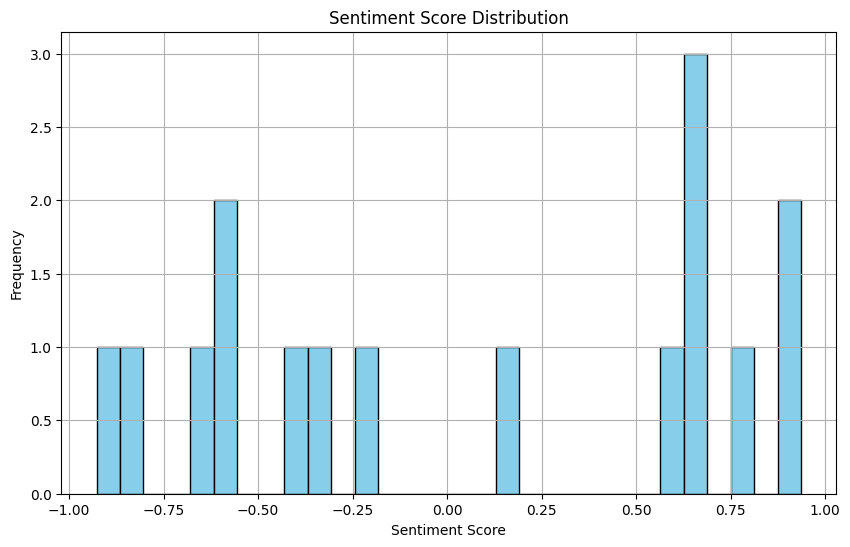

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(messages['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()



---



#### Sentiment Analysis with Textblob

In [ ]:
import pandas as pd
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Convert the 'message' column to strings
messages['text'] = messages['text'].astype(str)

In [ ]:
# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the message column
messages['sentiment'] = messages['text'].apply(get_sentiment)

# Display the sentiment scores
messages[['text', 'sentiment']].head(10)

,text,sentiment
date,,
2024-09-01 07:17:36,Weather Update\n\nA Western Disturbance is set...,0.022101
2024-09-02 15:57:03,Weather Alert\n\nThe convergence of a Western ...,-0.036364
2024-09-02 16:58:22,"Cyclone-Like Winds Sweep Through Kulgam, Gusts...",0.153571
2024-09-02 18:08:04,Reports indicate that a cloudburst near the Sp...,0.100000
2024-09-02 19:25:11,['SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VI...,-0.005000
2024-09-05 09:09:27,Weather Update\n\n05 Sept: Mostly dry and sunn...,-0.125926
2024-09-08 09:10:09,Jammu and Kashmir Set for Monsoon Exit Two Wee...,-0.042187
2024-09-08 10:05:33,With elections on the horizon in Jammu and Kas...,0.192593
2024-09-09 13:05:37,A deep depression is expected to move toward c...,-0.048313




---



#### Topic Modeling

In [ ]:
pip install pyLDAvis

In [ ]:
import pandas as pd
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize lemmatizer and stop words
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing
messages['processed'] = messages['text'].apply(preprocess)

# Display the first few processed messages
messages[['text', 'processed']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,processed
date,,
2024-09-01 07:17:36,Weather Update\n\nA Western Disturbance is set...,"[weather, update, western, disturbance, set, i..."
2024-09-02 15:57:03,Weather Alert\n\nThe convergence of a Western ...,"[weather, alert, convergence, western, disturb..."
2024-09-02 16:58:22,"Cyclone-Like Winds Sweep Through Kulgam, Gusts...","[wind, sweep, kulgam, gust, reach, afternoon, ..."
2024-09-02 18:08:04,Reports indicate that a cloudburst near the Sp...,"[report, indicate, cloudburst, near, sport, st..."
2024-09-02 19:25:11,['SHOPIAN POLICE ISSUED HELPLINE NUMBERS IN VI...,"[police, issued, helpline, number, view, adver..."


In [ ]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(messages['processed'])

# Create a corpus: list of bag-of-words
corpus = [dictionary.doc2bow(text) for text in messages['processed']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set parameters
num_topics = 5  # Change this to the number of topics you want to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Display the topics found by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

Topic 0: 0.047*"wind" + 0.024*"speed" + 0.024*"gust" + 0.018*"shopian" + 0.018*"emergency" + 0.018*"kulgam" + 0.018*"sustained" + 0.018*"weather" + 0.012*"imamsahib" + 0.012*"public"
Topic 1: 0.038*"weather" + 0.038*"part" + 0.034*"kashmir" + 0.034*"expected" + 0.026*"jammu" + 0.022*"rain" + 0.018*"shower" + 0.013*"spell" + 0.013*"dry" + 0.013*"update"
Topic 2: 0.037*"weather" + 0.034*"kashmir" + 0.030*"jammu" + 0.023*"sept" + 0.021*"september" + 0.019*"expected" + 0.018*"day" + 0.018*"highest" + 0.016*"dry" + 0.016*"shower"
Topic 3: 0.003*"weather" + 0.003*"wind" + 0.003*"jammu" + 0.003*"expected" + 0.003*"sept" + 0.003*"area" + 0.003*"mostly" + 0.003*"may" + 0.003*"dry" + 0.003*"shower"
Topic 4: 0.028*"weather" + 0.024*"expected" + 0.020*"area" + 0.020*"jammu" + 0.020*"kashmir" + 0.016*"western" + 0.016*"disturbance" + 0.016*"thundershower" + 0.016*"monsoon" + 0.016*"mostly"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare the visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# To save the visualization as HTML, use:
#pyLDAvis.save_html(vis, 'lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Notice:** pyLDAvis provides a good visualization capability for the user so that the user does not need to use other libraries and tools.



---



### 5. **Visualization**
   - **Graphs and Charts**: Create visual representations of your findings (e.g., bar charts for user activity, line graphs for message trends over time).
   - **Tools**: Use tools like Matplotlib, Seaborn, or Tableau for effective visualizations.

**Step 1:** Import Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **Bar Chart of Sentiment Scores**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-82-936f3339b6f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='sentiment', data=messages, palette='coolwarm')


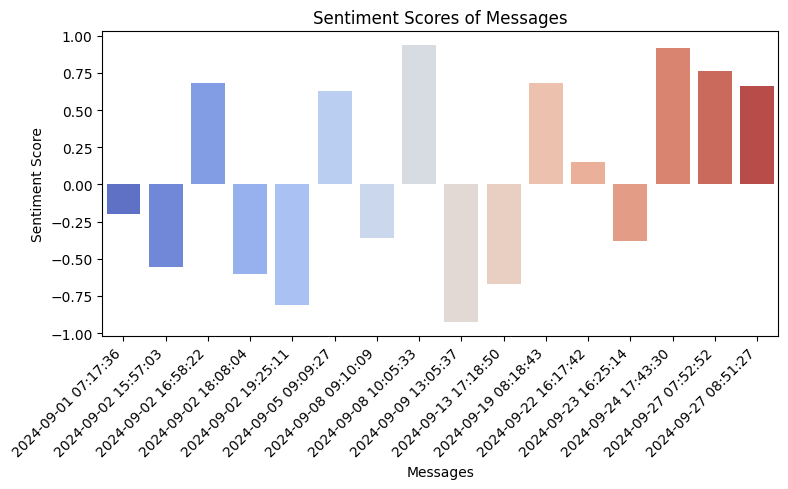

In [ ]:
# Bar chart of sentiment scores
plt.figure(figsize=(8, 5))
sns.barplot(x='date', y='sentiment', data=messages, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Scores of Messages')
plt.ylabel('Sentiment Score')
plt.xlabel('Messages')
plt.tight_layout()
plt.show()

##### **Histogram of Sentiment Scores**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


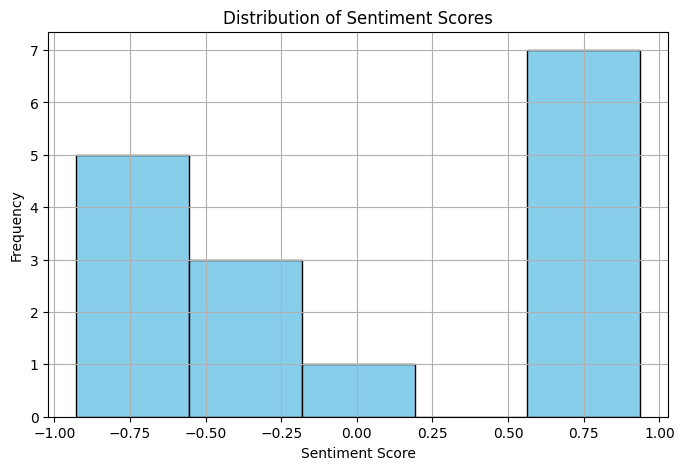

In [ ]:
# Histogram of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(messages['sentiment'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

##### **Line Chart of Sentiment Trends Over Time**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


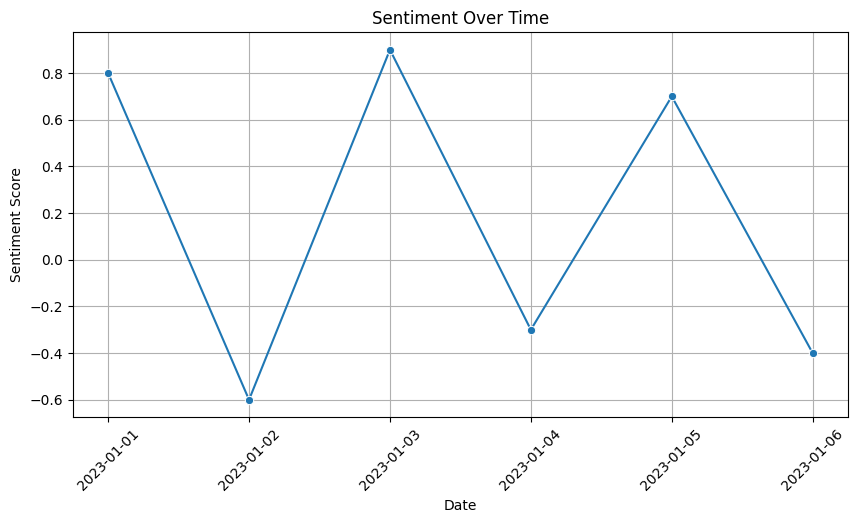

In [ ]:
# Sample data with timestamp
data_with_time = {
    'timestamp': pd.date_range(start='2023-01-01', periods=6),
    'sentiment': [0.8, -0.6, 0.9, -0.3, 0.7, -0.4]
}

messages_with_time = pd.DataFrame(data_with_time)

# Line chart of sentiment over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='timestamp', y='sentiment', data=messages_with_time, marker='o')
plt.title('Sentiment Over Time')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### **Word Cloud of Positive Sentiments**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


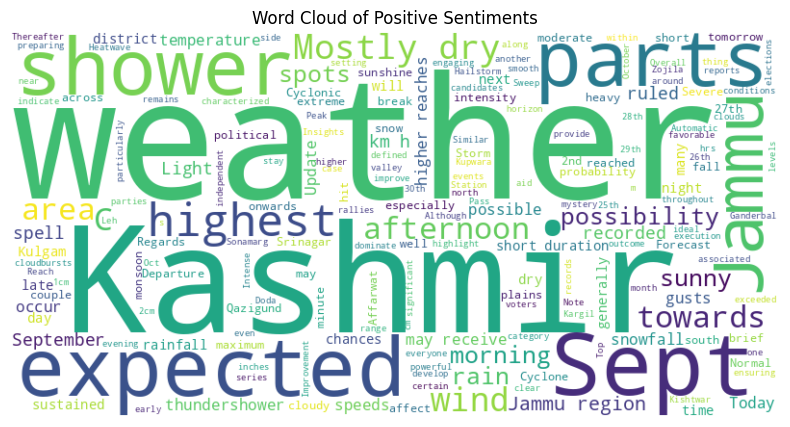

In [ ]:
# Create a word cloud for positive sentiments
positive_messages = messages[messages['sentiment'] > 0]['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_messages))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiments')
plt.show()

### 6. **Insights and Reporting**
   - **Summarize Findings**: Highlight key trends, user behavior patterns, and insights derived from the analysis.
   - **Create a Report**: Compile the analysis into a report with visuals, key metrics, and actionable insights.

In this telegram channel, more than anything, words and terms related to the weather and the city of Kashmir are used, which is an expected thing. With a glance at the bar chart and the rest of the charts, we can see that negative and positive feelings have been repeated alternately and have not been continuous. These positive and negative feelings refer to favorable or unfavorable weather conditions, which are related to the severity of the conditions (rain or snow or...).
Another thing that is noteworthy, strong negative and positive emotions are almost not seen in these data and generally have a certain balance in the middle of the distributed range. This means that severe accidents were probably very low or did not happen during this period of time.



---



### 7. **Ethical Considerations**
   - **User Privacy**: Ensure that personal data is anonymized and that you comply with privacy regulations.
   - **Data Sensitivity**: Handle sensitive information with care and respect user confidentiality.

**Considerations**:

This data is taken from a weather report channel and will be useful due to the independence of weather analysis from emotions. This means that whether the weather is good or bad is a report in itself and refers to good or bad weather conditions. This analysis is independent of whether the weather is sunny or stormy or such themes.

This data is in no way taken from a private channel and as marked is from a public channel. The analyzed information is related to the weather of Kashmir city, which is not a sensitive or confidential matter and is accessible to the public.

## Tools and Libraries
- **Python Libraries**: Pandas, NLTK, SpaCy, Matplotlib, Seaborn, NetworkX.
- **Data Visualization Tools**: Tableau, Power BI.



---



## Conclusion

This notebook referred to the sentiment analysis of the contents of a telegram channel related to the weather forecast of Kashmir city and examined whether the weather conditions were positive or negative. Of course, this may not be a good analysis because it happened in a short period of time and is only related to one channel and in a targeted manner. In general, sentiment analysis is done according to users' opinions and with specific goals, but this was only an example of the steps involved in sentiment analysis.